In [1]:
import pandas as pd
import seaborn as sns
from collections import Counter

/sctmp/jribas/ipykernel_3866647/2953294587.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
po_dataset_path = "/shares/wegner.ics.uzh/glc23_data/Presences_only_train.csv"
reduced_po_dataset_path = "/shares/wegner.ics.uzh/glc23_data/Pot_10_to_1000.csv"

In [3]:
full_data = pd.read_csv(po_dataset_path, sep=";")
reduced_data = pd.read_csv(reduced_po_dataset_path, sep=";")

In [4]:
data = full_data.copy()

In [5]:
data.sample(5)

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
4526303,878761,3.958570e+09,NaN,Pl@ntNet automatic,2020-05-09,130,2020,15.661510,50.14816,4725233.0,3019599.0,19.0,793,6679057,3658023
3387583,3240005,3.091445e+09,Turid Nakling Kristiansen;Per Marstad,NOR Species Observation,2021-04-22,112,2021,10.421980,59.08321,4345244.0,3998111.0,8.0,4312,5831816,2808383
4149411,1441403,3.069984e+09,Kamilla Svingen,NOR Species Observation,2020-08-31,244,2020,12.741560,66.36715,4444654.0,4808467.0,50.0,1486,6362166,3340040
1934338,4036004,2.826103e+09,Endre Nygaard,NOR Species Observation,2019-07-26,207,2019,6.366702,59.41819,4114356.0,4040559.0,10.0,2225,4863897,1840267
4195344,2524197,2.857475e+09,Via Invasiva Arter,ArtPortalen,2020-07-14,196,2020,13.090510,55.81939,4514776.0,3639179.0,10.0,5374,6406094,3384046


In [6]:
ids = data[["speciesId"]].to_numpy().tolist()
ids = [id[0] for id in ids]
c = Counter(ids)

In [50]:
data["speciesId"].value_counts().max() / data["speciesId"].value_counts().min()

4548.0

<Axes: >

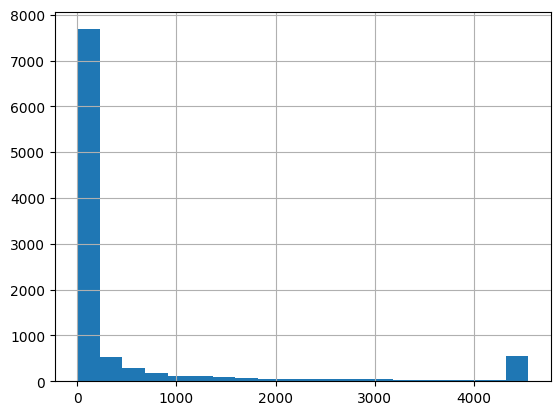

In [9]:
data["speciesId"].value_counts().hist(bins=20)

# Oversample the lower class